# Data Exploration Notebook
This notebook is used to download, clean and exploratory finanical data

## Key Activites:
1.  Download raw data into a portfolio
2.  Clean data for any Nan, duplicates, values
3.  Understand the type of data given after

In [ ]:
import sys
import os

# Add the project root to the Python path (one level up from notebooks directory)
project_root = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(project_root)

from src.data_processing import cleaners
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

print("Imports successful!")
print(f"Project root: {project_root}")

In [23]:
# Define portfolio of 8 stocks
portfolio_tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "NFLX"]
start_date = "2020-01-01"
end_date = "2023-01-01"

print(f"Downloading data for portfolio: {', '.join(portfolio_tickers)}")
print(f"Date range: {start_date} to {end_date}")

# Download data for all tickers
import yfinance as yf
import pandas as pd

# Dictionary to store individual stock data
stock_data = {}

print("\nDownloading individual stock data...")
for ticker in portfolio_tickers:
    print(f"  📈 {ticker}...", end="")
    try:
        df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        # Flatten multi-level columns if they exist
        if hasattr(df_ticker.columns, 'nlevels') and df_ticker.columns.nlevels > 1:
            df_ticker.columns = df_ticker.columns.get_level_values(0)
        
        stock_data[ticker] = df_ticker
        print(f" ✅ ({df_ticker.shape[0]} days)")
    except Exception as e:
        print(f" ❌ Error: {e}")

# Create a combined DataFrame with Close prices for all stocks
print(f"\nCreating portfolio DataFrame...")
portfolio_closes = pd.DataFrame()

for ticker, df_ticker in stock_data.items():
    portfolio_closes[ticker] = df_ticker['Close']

print(f"Portfolio data shape: {portfolio_closes.shape}")
print(f"Date range: {portfolio_closes.index[0].strftime('%Y-%m-%d')} to {portfolio_closes.index[-1].strftime('%Y-%m-%d')}")
print(f"\nFirst few rows of portfolio close prices:")
print(portfolio_closes.head())
print(f"\nMissing values per stock:")
print(portfolio_closes.isnull().sum())

Date range: 2020-01-01 to 2023-01-01

  📈 AAPL... ✅ (756 days)
  📈 MSFT... ✅ (756 days)
  📈 GOOGL...

/tmp/ipykernel_30718/2370403219.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipykernel_30718/2370403219.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipykernel_30718/2370403219.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)


 ✅ (756 days)
  📈 AMZN... ✅ (756 days)
  📈 TSLA... ✅ (756 days)
  📈 NVDA...

/tmp/ipykernel_30718/2370403219.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipykernel_30718/2370403219.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipykernel_30718/2370403219.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)


 ✅ (756 days)
  📈 META... ✅ (756 days)
  📈 NFLX...

/tmp/ipykernel_30718/2370403219.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipykernel_30718/2370403219.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)


 ✅ (756 days)

Creating portfolio DataFrame...
Portfolio data shape: (756, 8)
Date range: 2020-01-02 to 2022-12-30

First few rows of portfolio close prices:
                 AAPL        MSFT      GOOGL       AMZN       TSLA      NVDA  \
Date                                                                           
2020-01-02  72.538513  152.791107  67.965233  94.900497  28.684000  5.971410   
2020-01-03  71.833305  150.888580  67.609680  93.748497  29.534000  5.875832   
2020-01-06  72.405670  151.278656  69.411766  95.143997  30.102667  5.900474   
2020-01-07  72.065155  149.899277  69.277679  95.343002  31.270666  5.971908   
2020-01-08  73.224396  152.286926  69.770775  94.598503  32.809334  5.983109   

                  META        NFLX  
Date                                
2020-01-02  208.494690  329.809998  
2020-01-03  207.391510  325.899994  
2020-01-06  211.297409  335.829987  
2020-01-07  211.754578  330.750000  
2020-01-08  213.901352  339.260010  

Missing values per st

In [24]:
# Calculate technical indicators for the portfolio
long_window = 50
short_window = 20

# Dictionary to store enhanced data for each stock
portfolio_data = {}

print("Calculating technical indicators for each stock...")
for ticker in portfolio_tickers:
    if ticker in stock_data:
        df = stock_data[ticker].copy()
        
        # Calculate moving averages
        df[f'MA_{long_window}'] = df['Close'].rolling(window=long_window).mean()
        df[f'MA_{short_window}'] = df['Close'].rolling(window=short_window).mean()
        
        # Calculate daily returns
        df['Daily_Return'] = df['Close'].pct_change()
        
        # Calculate volatility (standard deviation of daily returns)
        df['Volatility'] = df['Daily_Return'].rolling(window=short_window).std()
        
        portfolio_data[ticker] = df
        print(f"  ✅ {ticker}: {df.shape[0]} rows, {df.shape[1]} columns")

# Create portfolio-level metrics
print(f"\nCalculating portfolio-level metrics...")

# Portfolio daily returns (equal weighted)
portfolio_returns = portfolio_closes.pct_change()
portfolio_avg_return = portfolio_returns.mean(axis=1)  # Average return across all stocks each day

# Portfolio volatility
portfolio_volatility = portfolio_returns.rolling(window=short_window).std().mean(axis=1)

print(f"Portfolio returns shape: {portfolio_returns.shape}")
print(f"\nSample portfolio data:")
print(f"Average portfolio daily return: {portfolio_avg_return.mean()*100:.3f}%")
print(f"Portfolio volatility (avg): {portfolio_volatility.mean()*100:.3f}%")
print(f"Best performing stock (total return):")

# Calculate total returns for each stock
total_returns = {}
for ticker in portfolio_tickers:
    if ticker in portfolio_closes.columns:
        start_price = portfolio_closes[ticker].dropna().iloc[0]
        end_price = portfolio_closes[ticker].dropna().iloc[-1]
        total_return = ((end_price / start_price) - 1) * 100
        total_returns[ticker] = total_return

# Sort by performance
sorted_returns = sorted(total_returns.items(), key=lambda x: x[1], reverse=True)
for i, (ticker, return_pct) in enumerate(sorted_returns, 1):
    print(f"  {i}. {ticker}: {return_pct:.2f}%")

Calculating technical indicators for each stock...
  ✅ AAPL: 756 rows, 9 columns
  ✅ MSFT: 756 rows, 9 columns
  ✅ GOOGL: 756 rows, 9 columns
  ✅ AMZN: 756 rows, 9 columns
  ✅ TSLA: 756 rows, 9 columns
  ✅ NVDA: 756 rows, 9 columns
  ✅ META: 756 rows, 9 columns
  ✅ NFLX: 756 rows, 9 columns

Calculating portfolio-level metrics...
Portfolio returns shape: (756, 8)

Sample portfolio data:
Average portfolio daily return: 0.094%
Portfolio volatility (avg): 2.710%
Best performing stock (total return):
  1. TSLA: 329.44%
  2. NVDA: 144.50%
  3. AAPL: 76.63%
  4. MSFT: 53.58%
  5. GOOGL: 28.93%
  6. NFLX: -10.59%
  7. AMZN: -11.49%
  8. META: -42.64%


In [25]:
# Portfolio analysis and statistics
print("=== PORTFOLIO EXPLORATION SUMMARY ===")
print(f"Portfolio: {', '.join(portfolio_tickers)}")
print(f"Dataset period: {portfolio_closes.index[0].strftime('%Y-%m-%d')} to {portfolio_closes.index[-1].strftime('%Y-%m-%d')}")
print(f"Total trading days: {len(portfolio_closes)}")
print(f"Missing values: {portfolio_closes.isnull().sum().sum()}")

print("\n=== PORTFOLIO PERFORMANCE RANKING ===")
for i, (ticker, return_pct) in enumerate(sorted_returns, 1):
    start_price = portfolio_closes[ticker].dropna().iloc[0]
    end_price = portfolio_closes[ticker].dropna().iloc[-1]
    print(f"{i:2d}. {ticker:5s}: {return_pct:7.2f}% (${start_price:6.2f} → ${end_price:6.2f})")

print(f"\n=== PORTFOLIO STATISTICS ===")
portfolio_start_value = portfolio_closes.iloc[0].sum()
portfolio_end_value = portfolio_closes.iloc[-1].sum()
portfolio_total_return = ((portfolio_end_value / portfolio_start_value) - 1) * 100

print(f"Equal-weighted portfolio return: {portfolio_total_return:.2f}%")
print(f"Average daily return: {portfolio_avg_return.mean()*100:.3f}%")
print(f"Portfolio daily volatility: {portfolio_avg_return.std()*100:.3f}%")
print(f"Annualized portfolio volatility: {portfolio_avg_return.std() * (252**0.5) * 100:.2f}%")

print(f"\n=== INDIVIDUAL STOCK VOLATILITY ===")
vol_stats = []
for ticker in portfolio_tickers:
    if ticker in portfolio_data:
        daily_vol = portfolio_data[ticker]['Daily_Return'].std() * 100
        annual_vol = daily_vol * (252**0.5)
        vol_stats.append((ticker, daily_vol, annual_vol))

# Sort by volatility
vol_stats.sort(key=lambda x: x[2])
for ticker, daily_vol, annual_vol in vol_stats:
    print(f"  {ticker:5s}: {daily_vol:.2f}% daily, {annual_vol:.2f}% annual")

=== PORTFOLIO EXPLORATION SUMMARY ===
Portfolio: AAPL, MSFT, GOOGL, AMZN, TSLA, NVDA, META, NFLX
Dataset period: 2020-01-02 to 2022-12-30
Total trading days: 756
Missing values: 0

=== PORTFOLIO PERFORMANCE RANKING ===
 1. TSLA :  329.44% ($ 28.68 → $123.18)
 2. NVDA :  144.50% ($  5.97 → $ 14.60)
 3. AAPL :   76.63% ($ 72.54 → $128.12)
 4. MSFT :   53.58% ($152.79 → $234.66)
 5. GOOGL:   28.93% ($ 67.97 → $ 87.63)
 6. NFLX :  -10.59% ($329.81 → $294.88)
 7. AMZN :  -11.49% ($ 94.90 → $ 84.00)
 8. META :  -42.64% ($208.49 → $119.60)

=== PORTFOLIO STATISTICS ===
Equal-weighted portfolio return: 13.06%
Average daily return: 0.094%
Portfolio daily volatility: 2.341%
Annualized portfolio volatility: 37.15%

=== INDIVIDUAL STOCK VOLATILITY ===
  GOOGL: 2.17% daily, 34.52% annual
  MSFT : 2.19% daily, 34.76% annual
  AAPL : 2.33% daily, 36.93% annual
  AMZN : 2.46% daily, 39.08% annual
  META : 3.07% daily, 48.72% annual
  NFLX : 3.27% daily, 51.86% annual
  NVDA : 3.53% daily, 55.98% annua

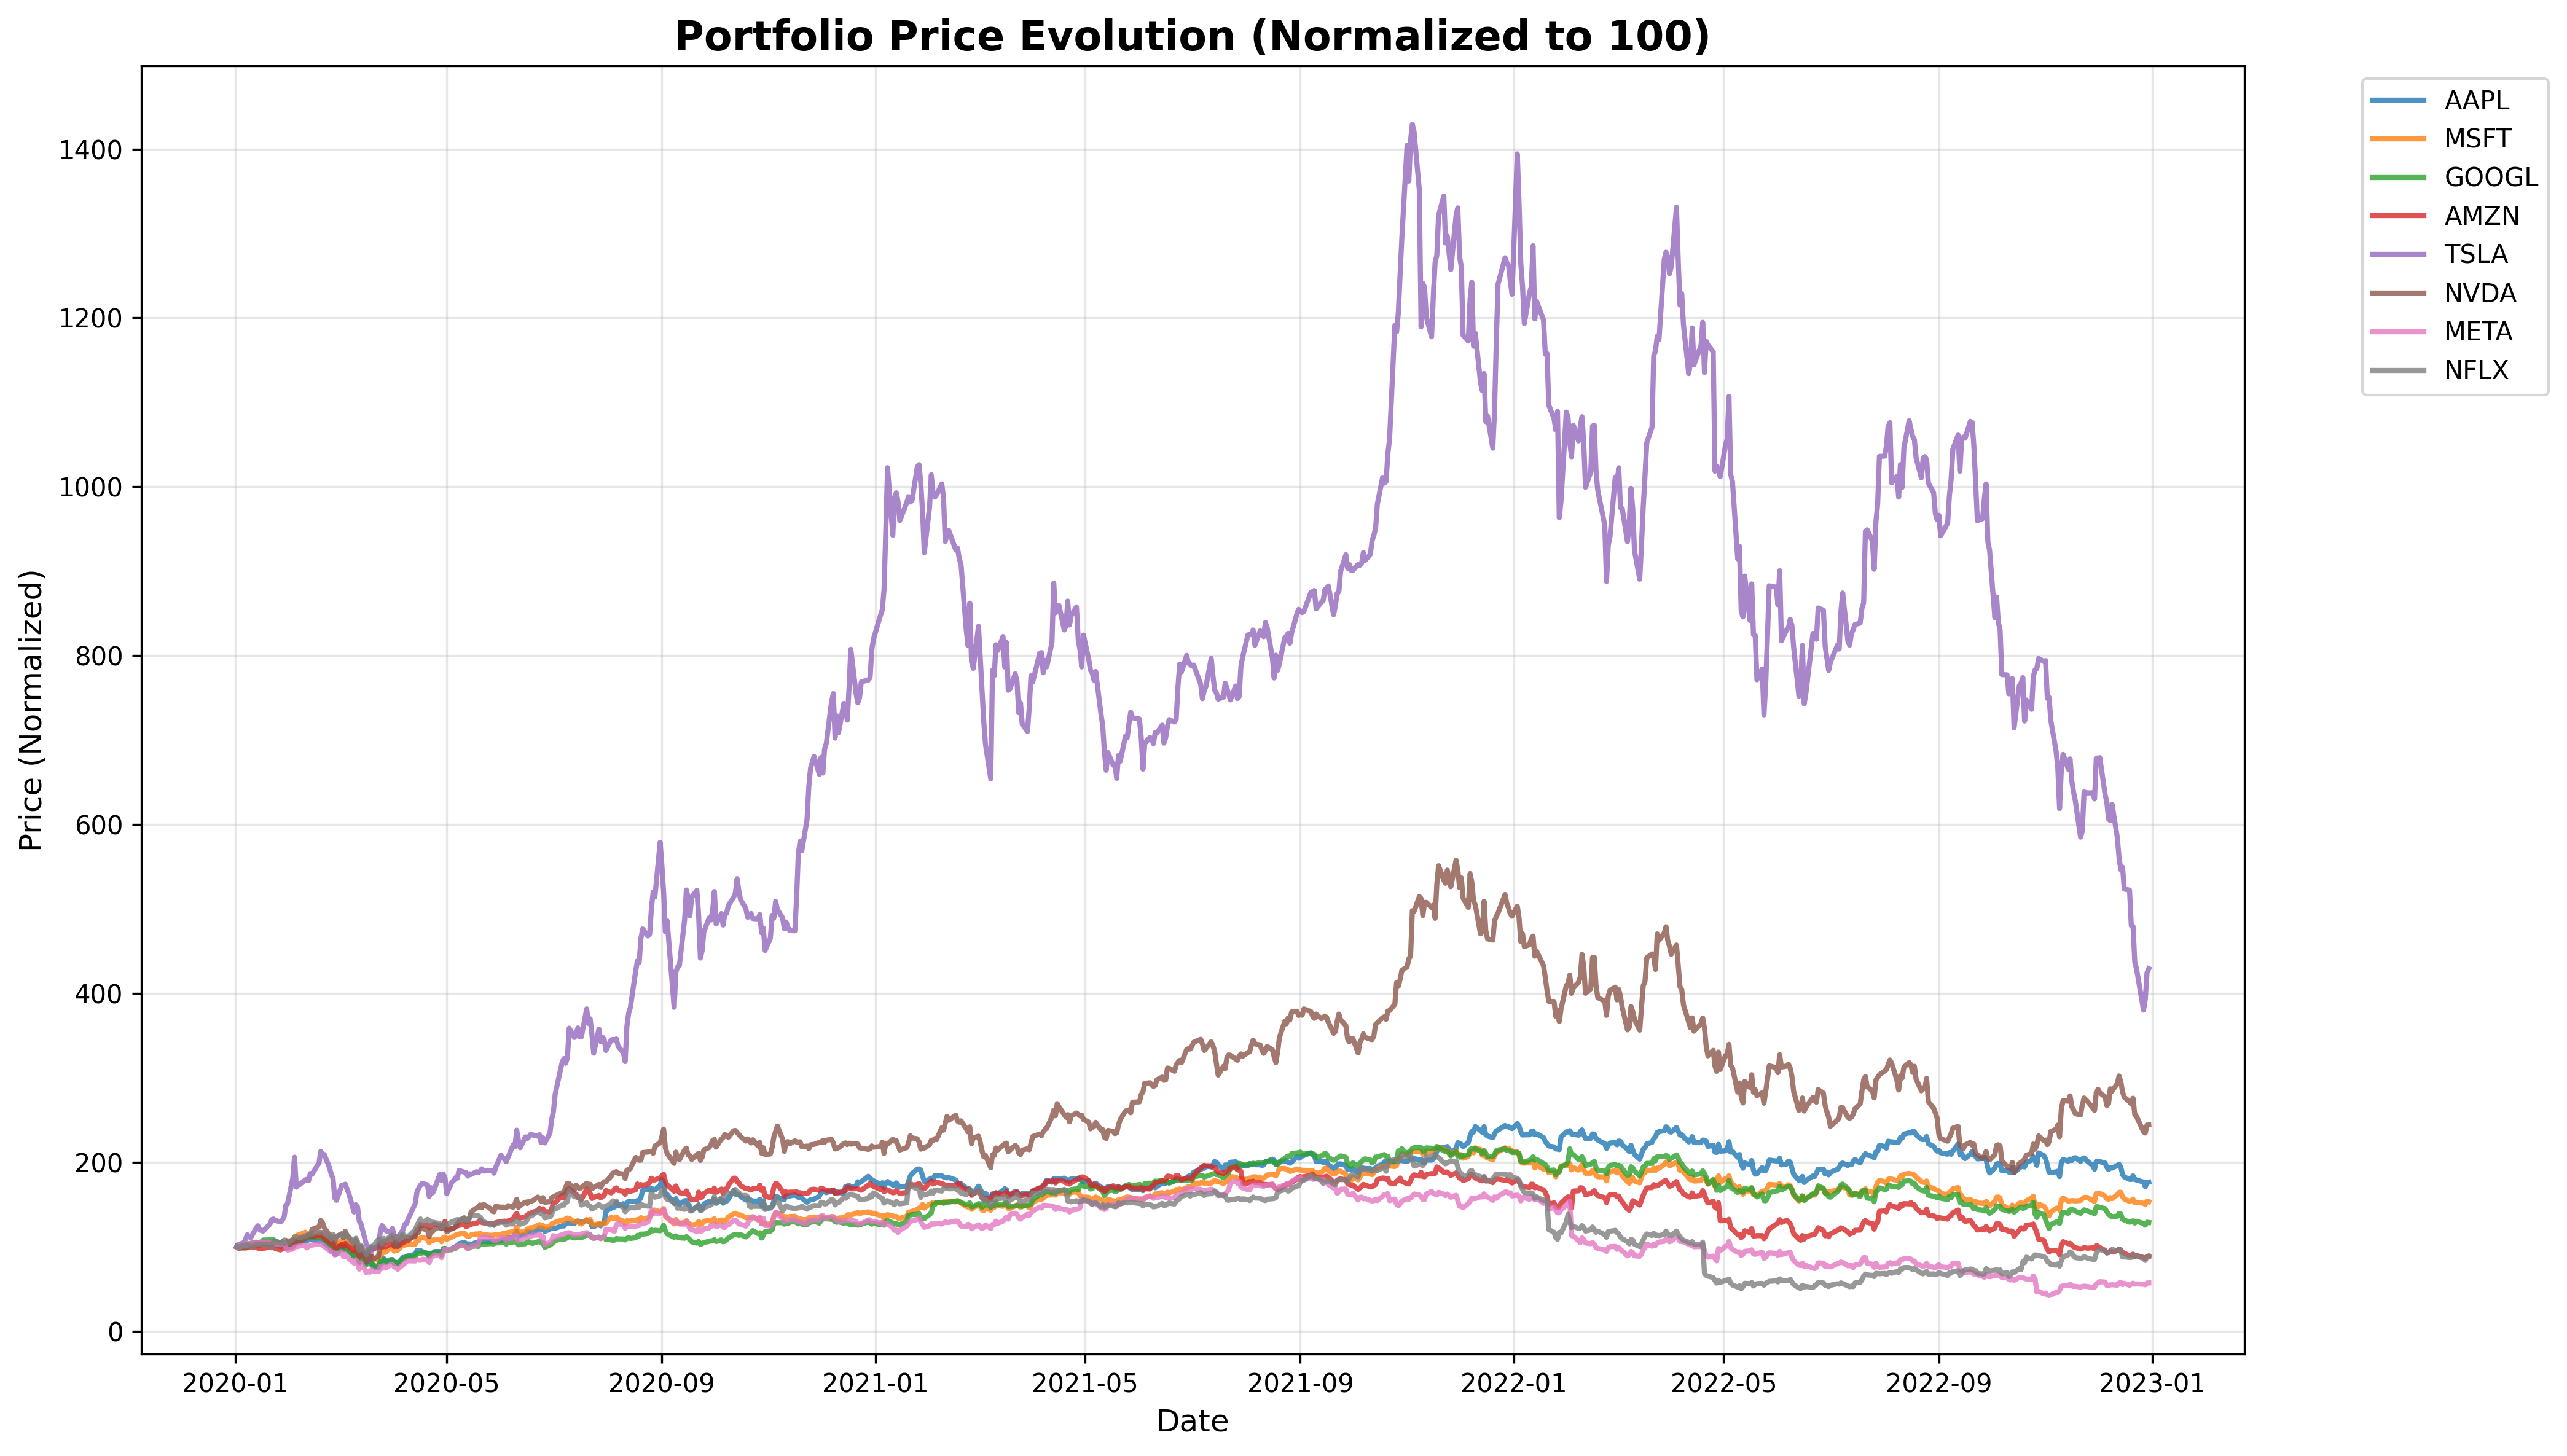

✅ Saved: PORTFOLIO_price_evolution_normalized.png


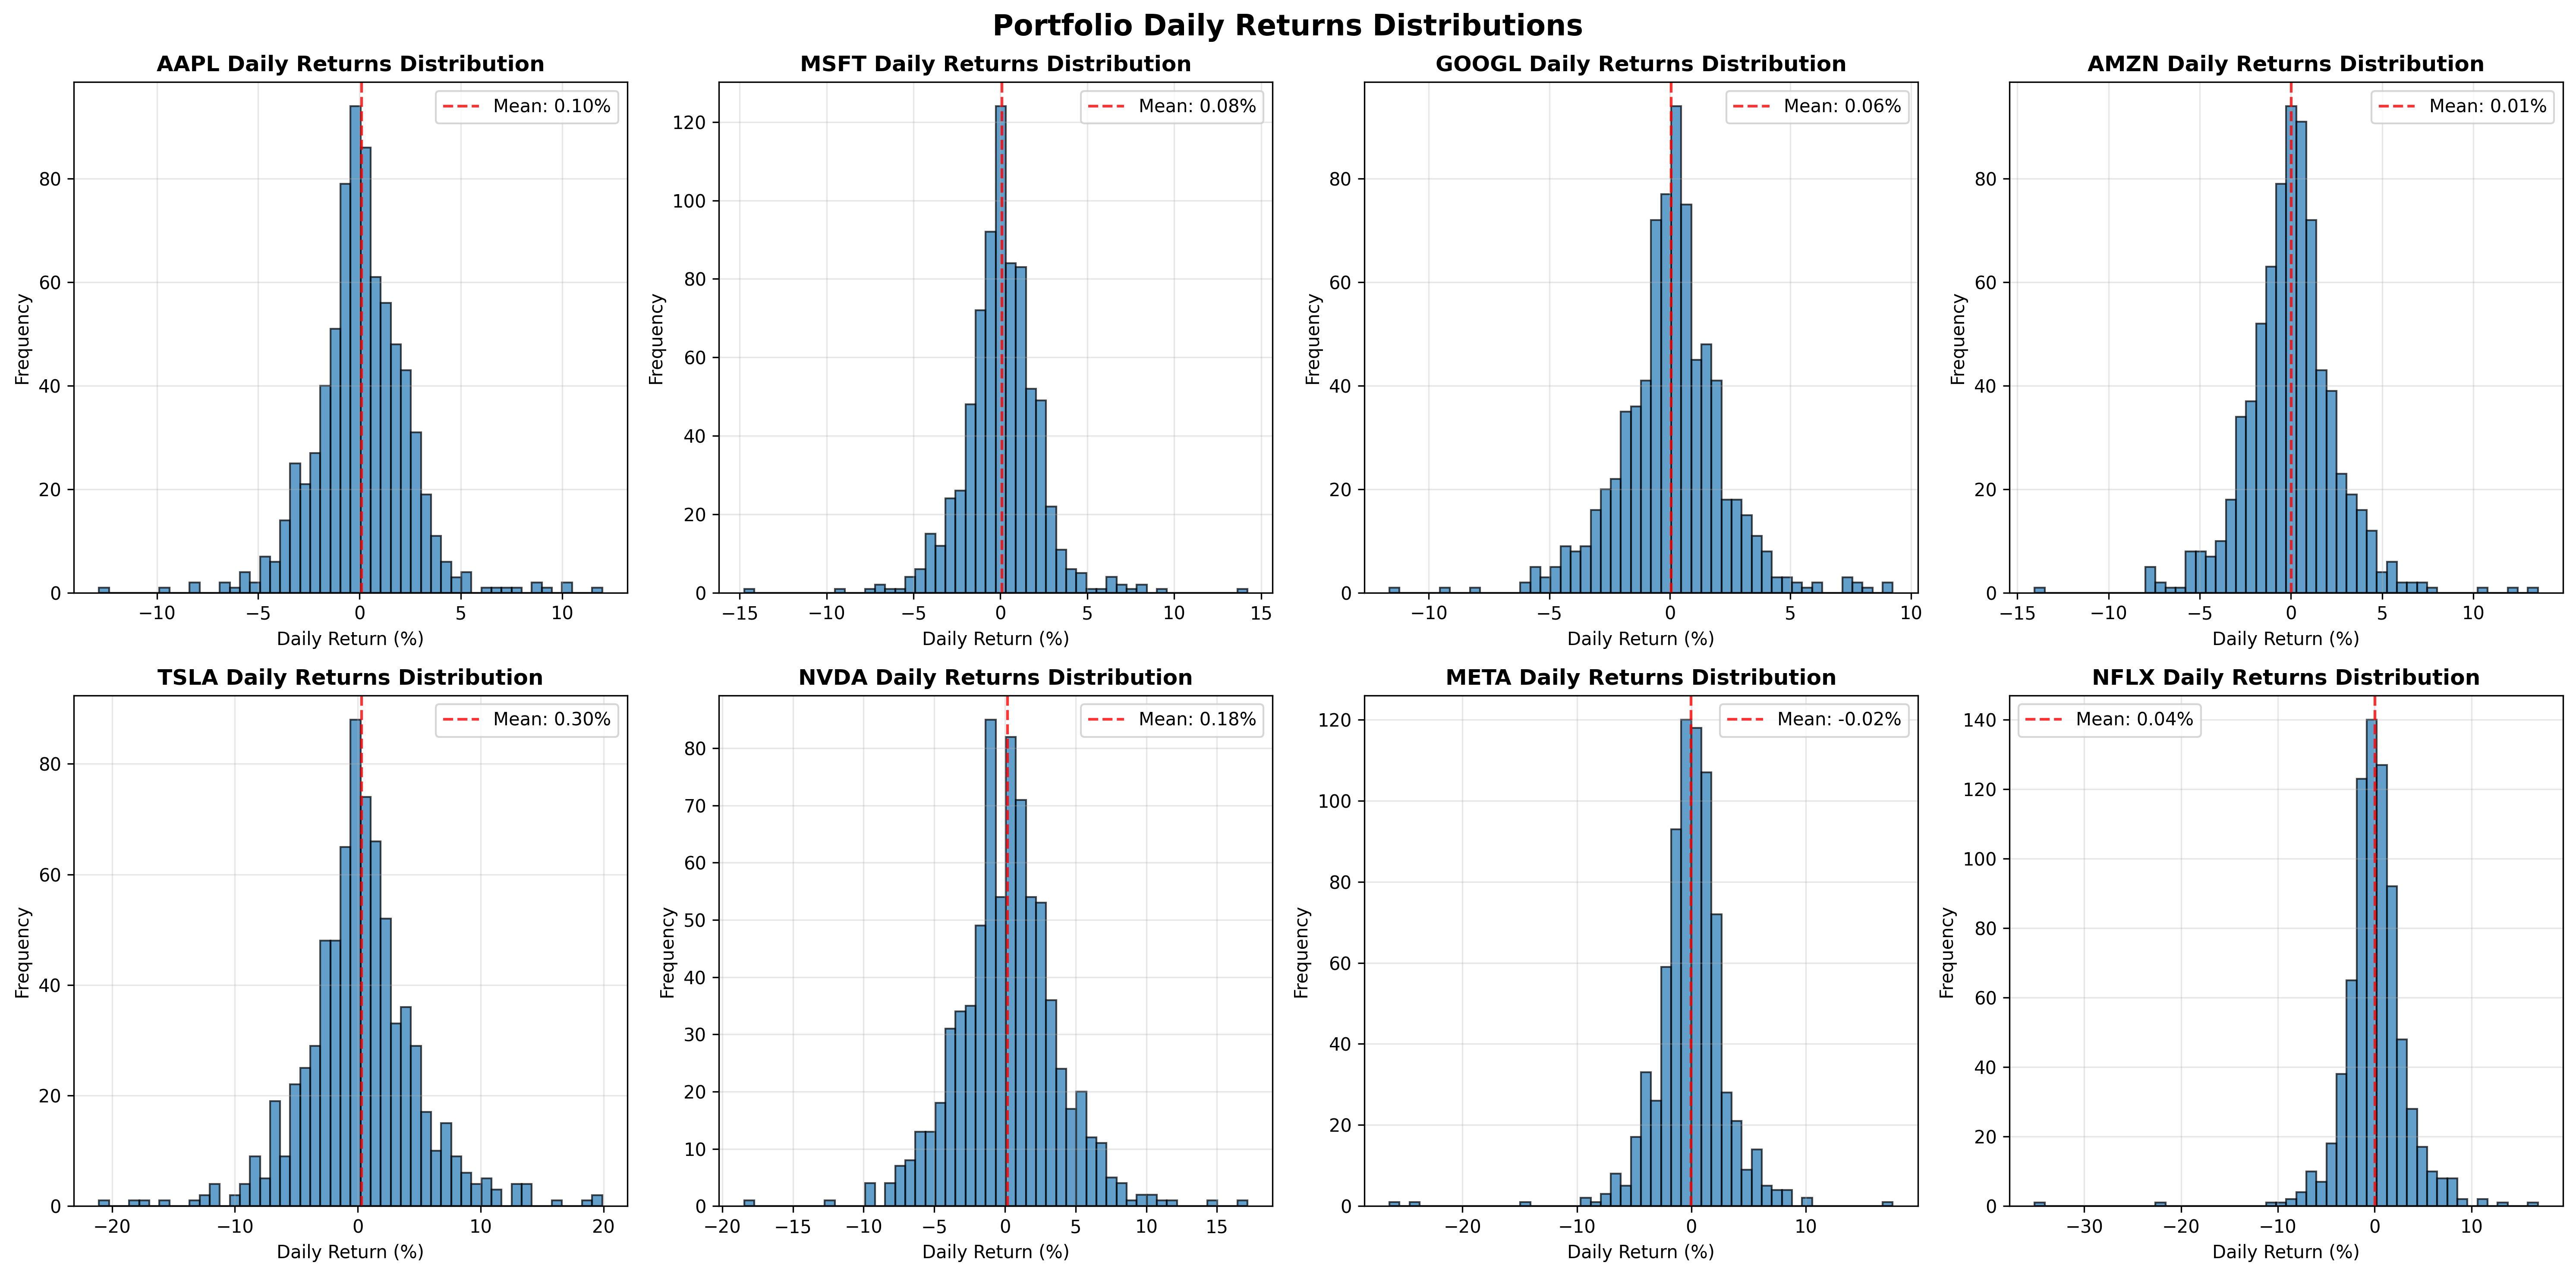

✅ Saved: PORTFOLIO_returns_distributions.png


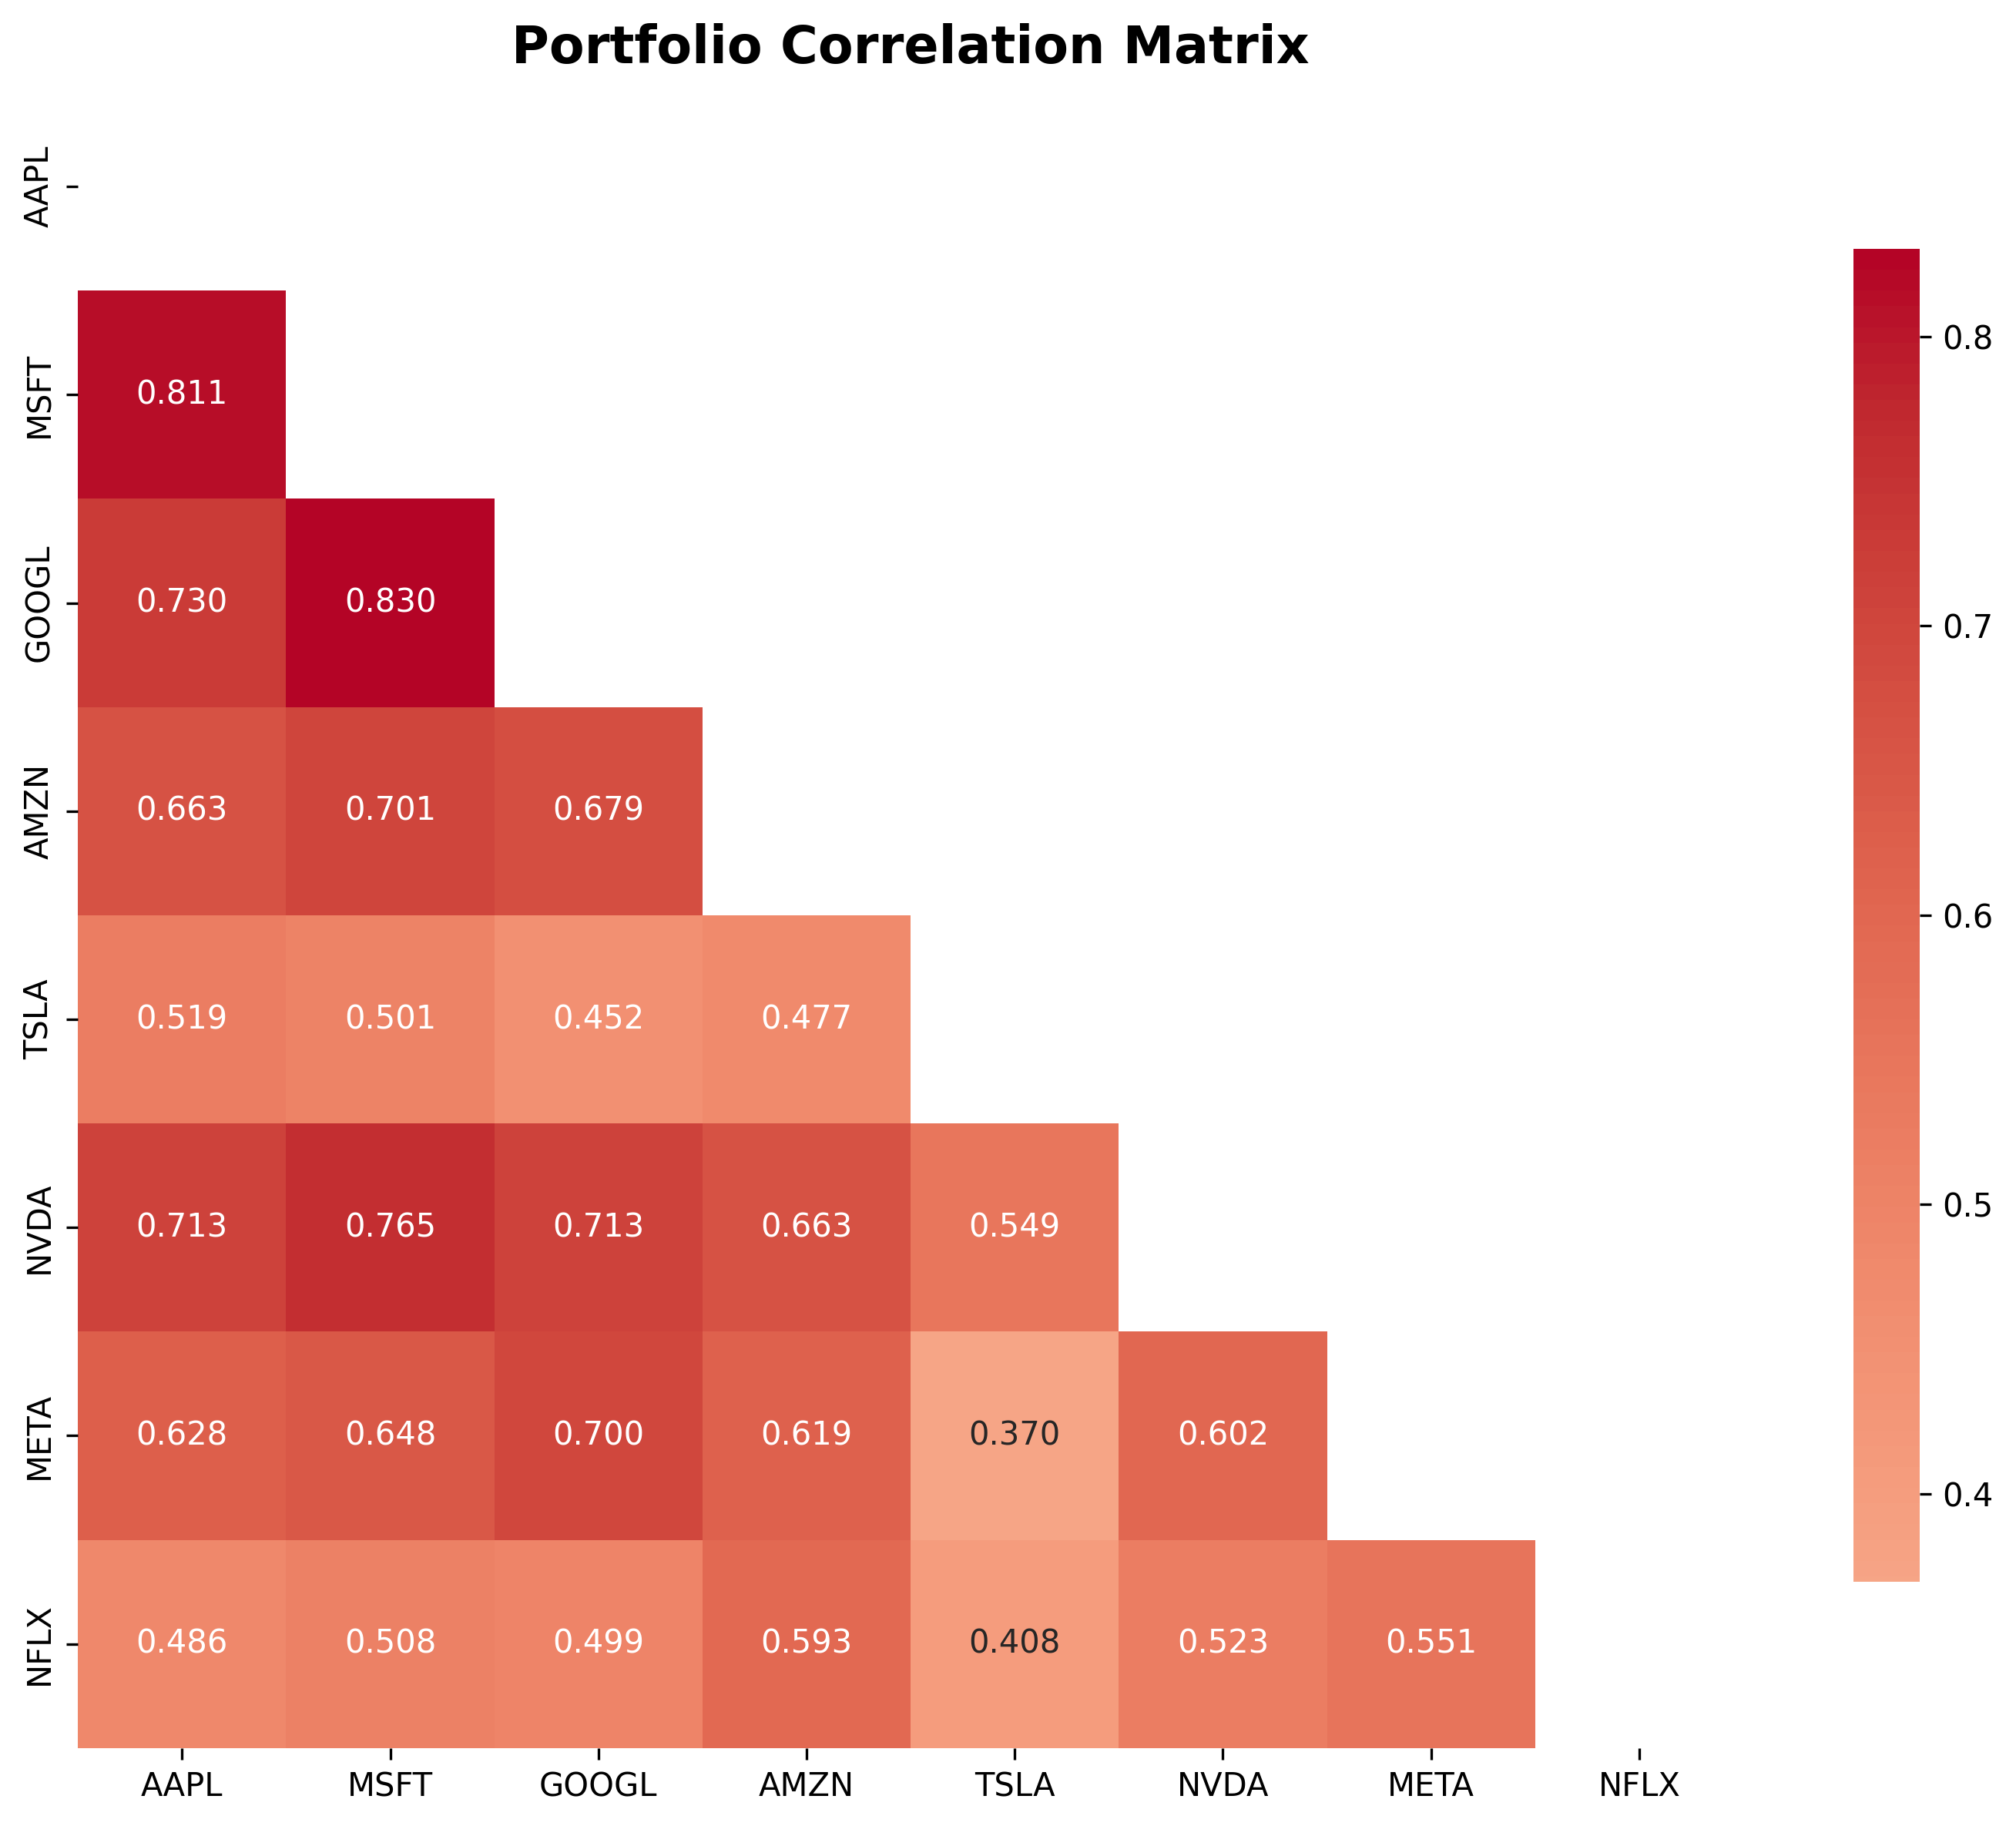

✅ Saved: PORTFOLIO_correlation_heatmap.png


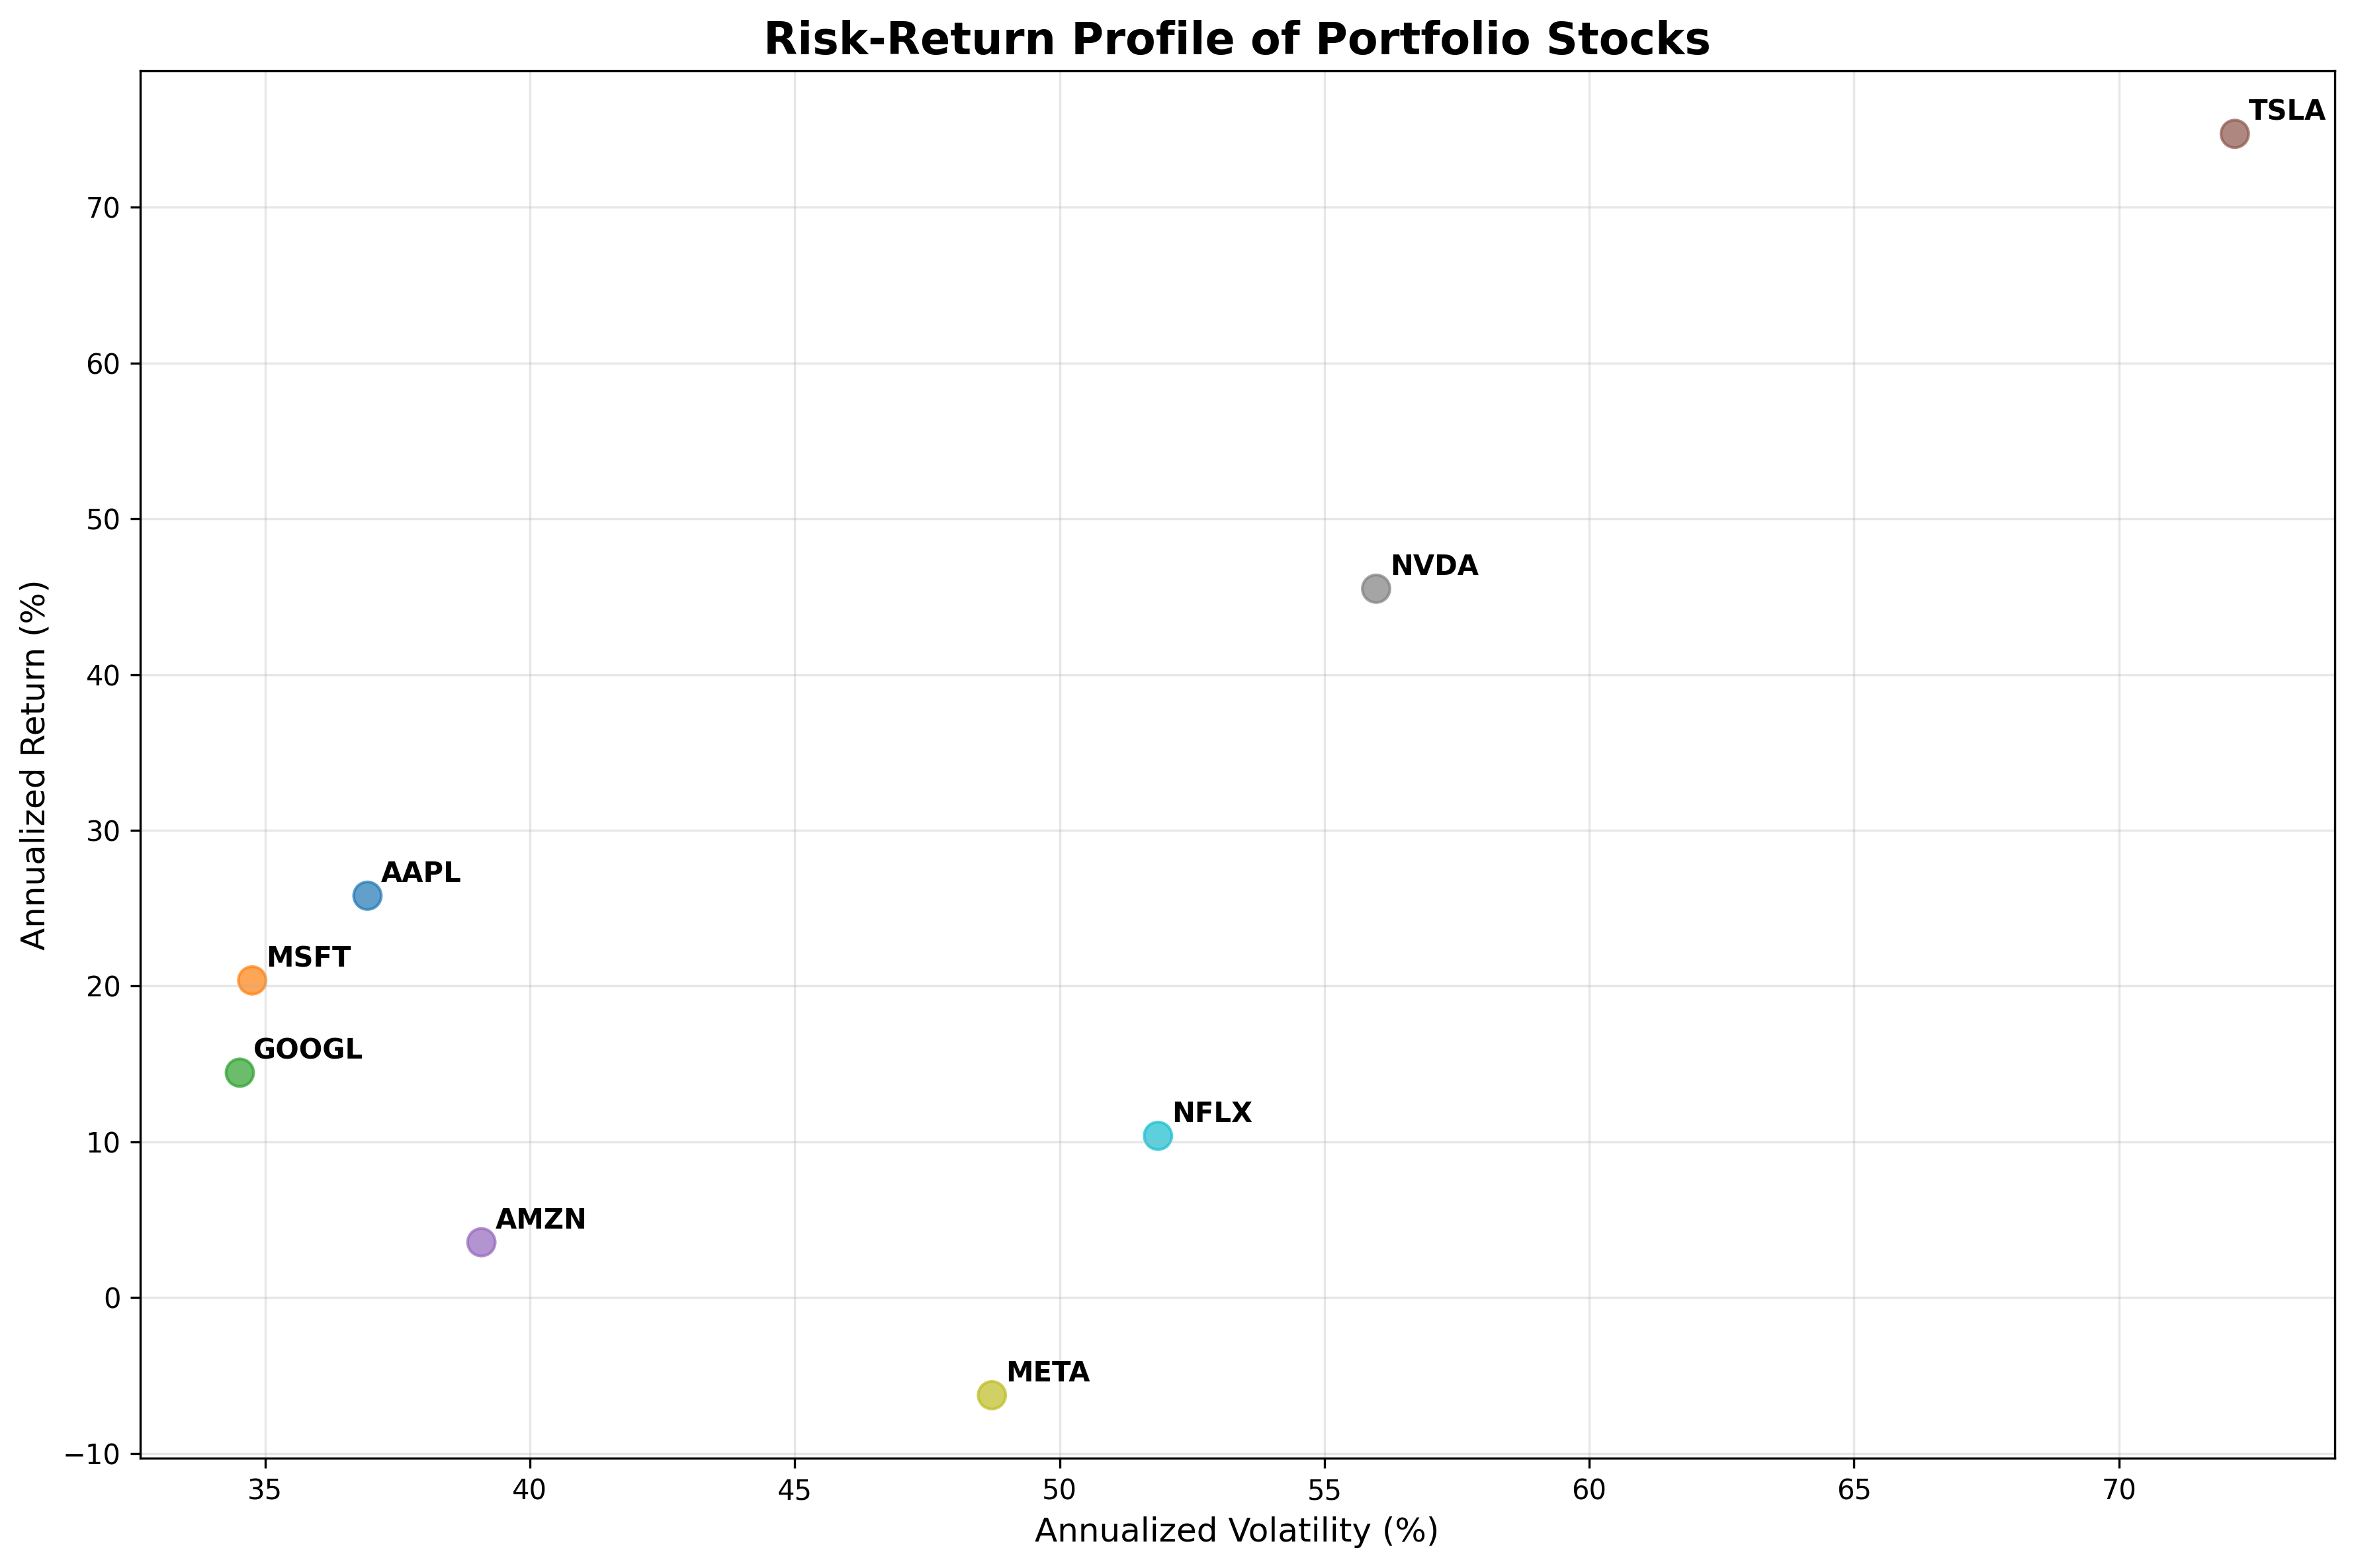

✅ Saved: PORTFOLIO_risk_return_scatter.png


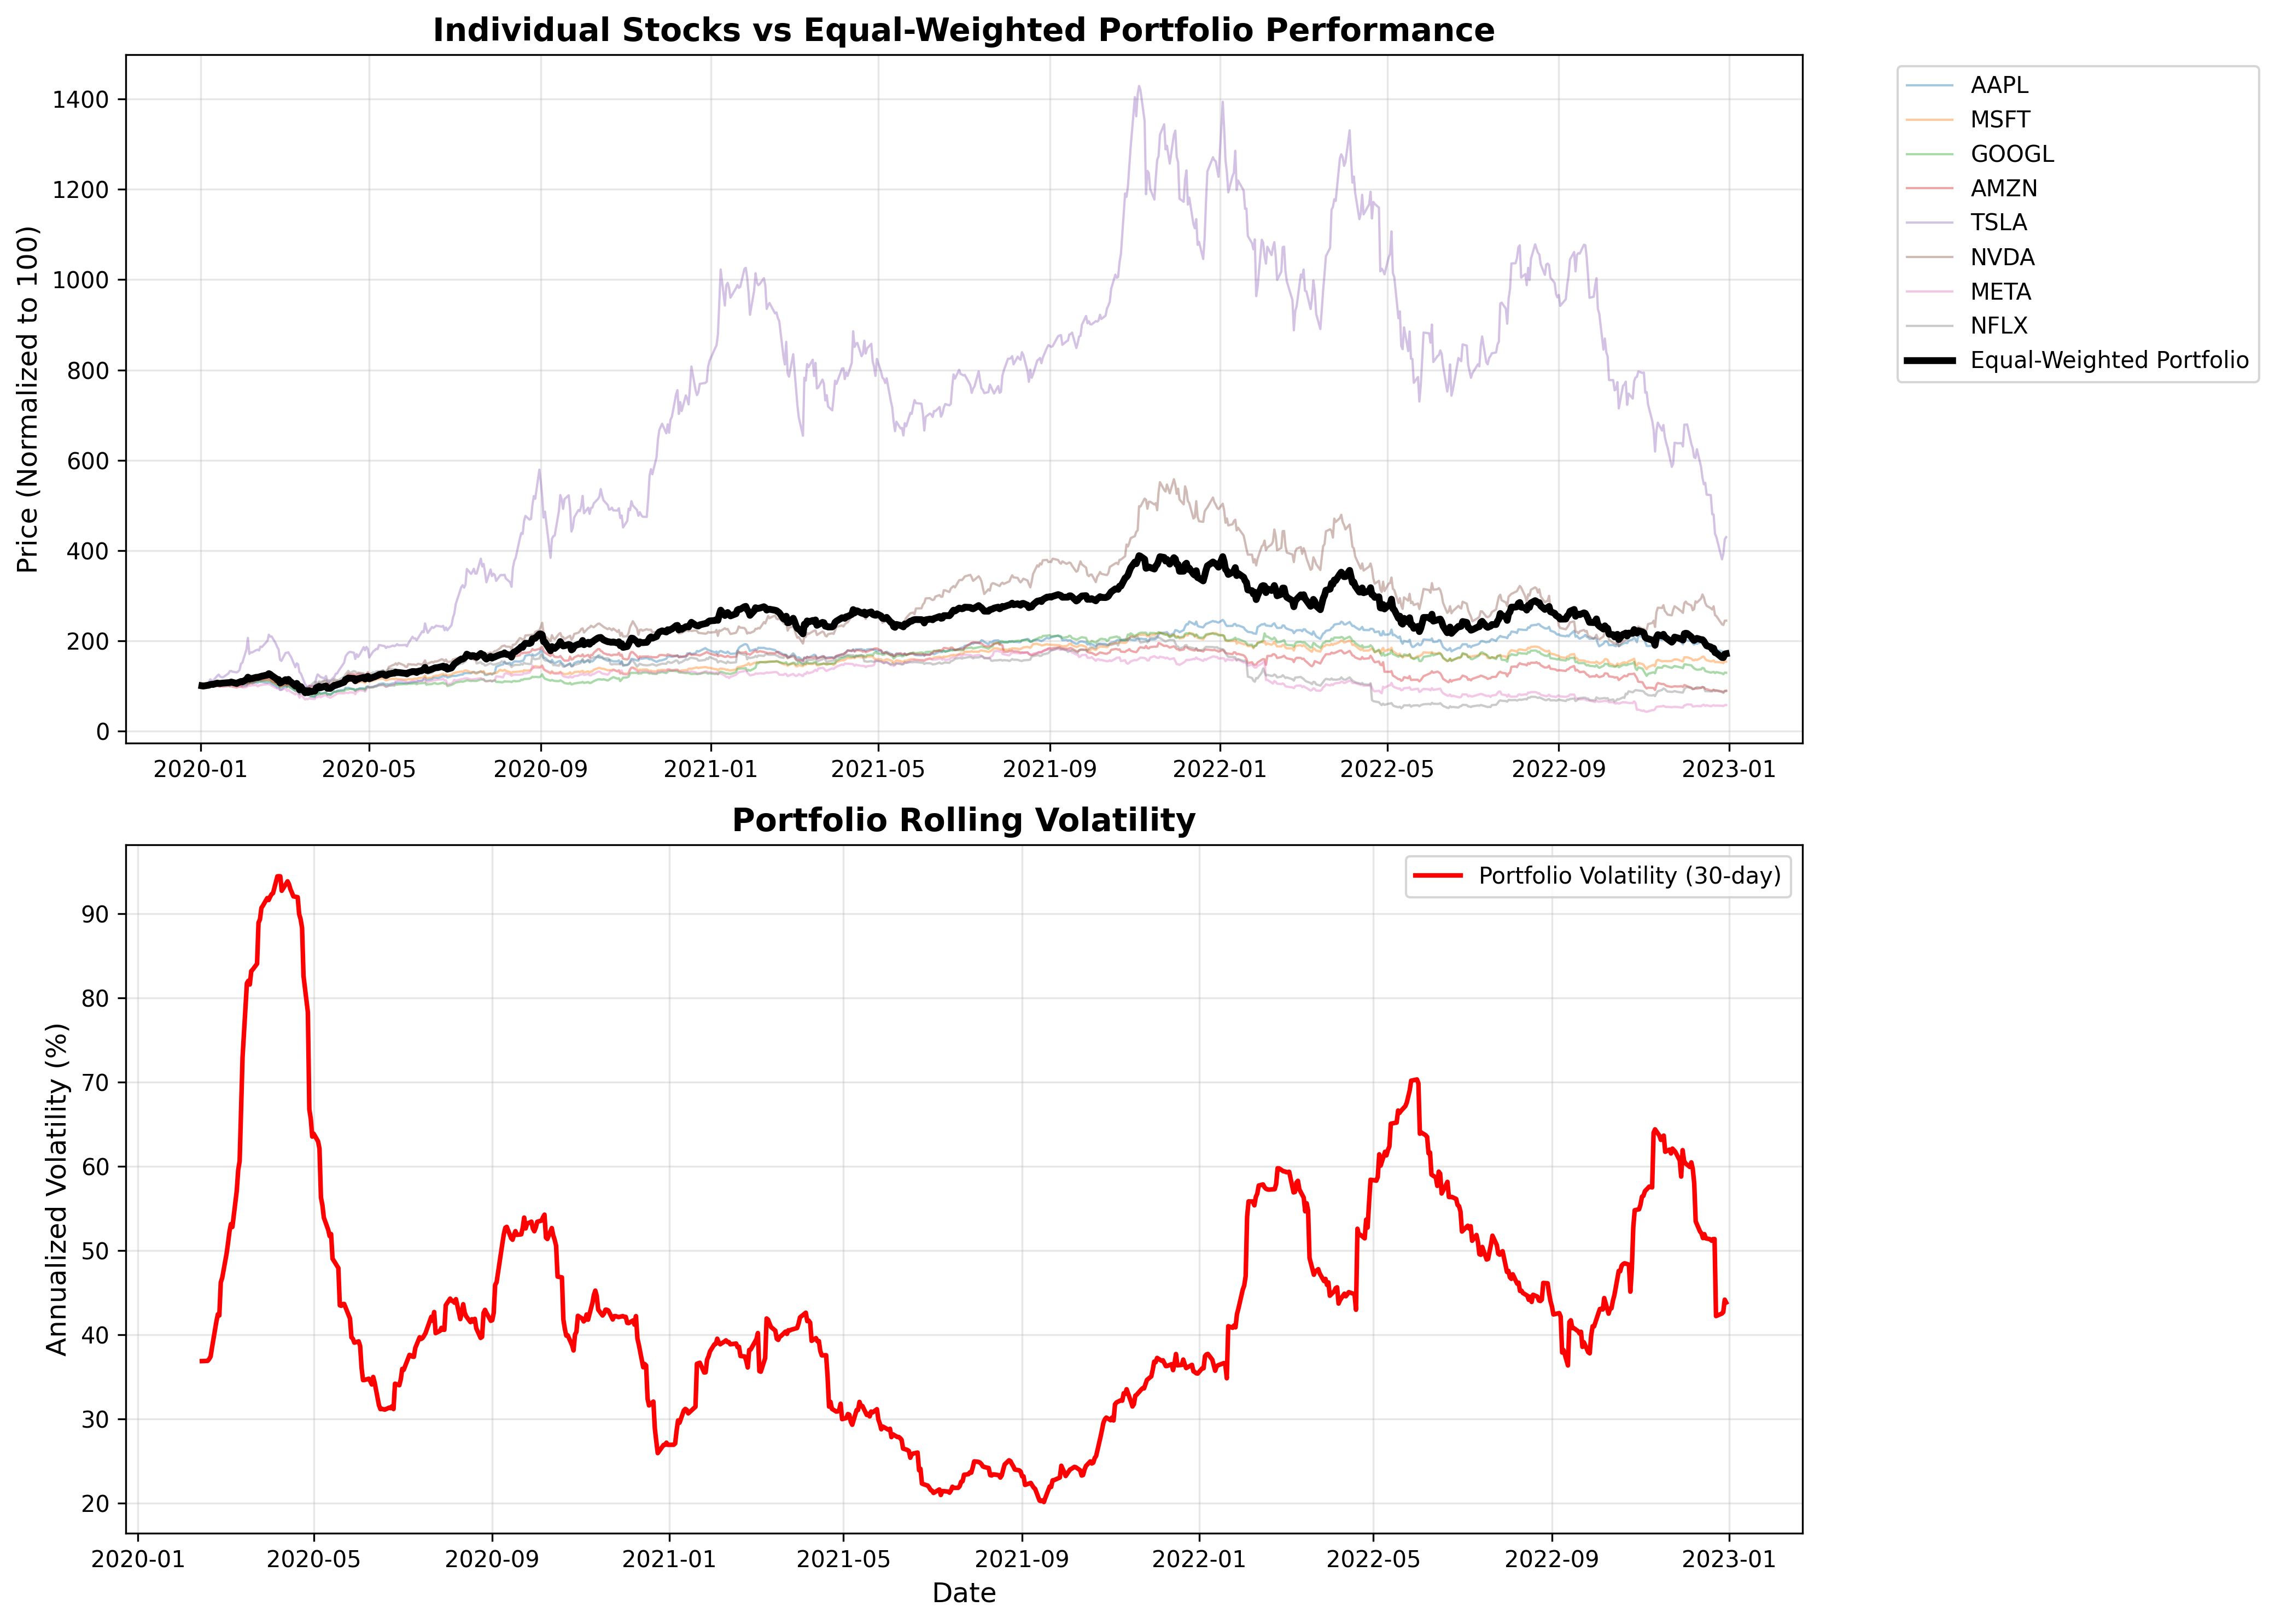

✅ Saved: PORTFOLIO_performance_comparison.png

🎯 All portfolio figures saved to: /workspaces/-Cross-Sectional-Equity-Momentum-Reversal-Factor/reports/figures
✅ Portfolio analysis and visualization complete!


In [26]:
# Create and save portfolio visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create reports/figures directory path
project_root = os.path.dirname(os.path.abspath(os.getcwd()))
figures_dir = os.path.join(project_root, "reports", "figures")
os.makedirs(figures_dir, exist_ok=True)

# Set up matplotlib parameters for better quality
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# Figure 1: Portfolio Price Evolution (Normalized to 100)
plt.figure(figsize=(14, 8))
normalized_prices = portfolio_closes.div(portfolio_closes.iloc[0]).mul(100)

colors = plt.cm.tab10(range(len(portfolio_tickers)))
for i, ticker in enumerate(portfolio_tickers):
    if ticker in normalized_prices.columns:
        plt.plot(normalized_prices.index, normalized_prices[ticker], 
                label=ticker, alpha=0.8, linewidth=2, color=colors[i])

plt.title('Portfolio Price Evolution (Normalized to 100)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (Normalized)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
figure_name = "PORTFOLIO_price_evolution_normalized.png"
plt.savefig(os.path.join(figures_dir, figure_name))
plt.show()
print(f"✅ Saved: {figure_name}")

# Figure 2: Individual Stock Returns Distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, ticker in enumerate(portfolio_tickers):
    if ticker in portfolio_data:
        returns = portfolio_data[ticker]['Daily_Return'] * 100
        returns.hist(bins=50, alpha=0.7, ax=axes[i], edgecolor='black')
        axes[i].set_title(f'{ticker} Daily Returns Distribution', fontweight='bold')
        axes[i].set_xlabel('Daily Return (%)')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)
        axes[i].axvline(returns.mean(), color='red', linestyle='--', alpha=0.8, label=f'Mean: {returns.mean():.2f}%')
        axes[i].legend()

plt.suptitle('Portfolio Daily Returns Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
figure_name = "PORTFOLIO_returns_distributions.png"
plt.savefig(os.path.join(figures_dir, figure_name))
plt.show()
print(f"✅ Saved: {figure_name}")

# Figure 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = portfolio_returns.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Portfolio Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
figure_name = "PORTFOLIO_correlation_heatmap.png"
plt.savefig(os.path.join(figures_dir, figure_name))
plt.show()
print(f"✅ Saved: {figure_name}")

# Figure 4: Risk-Return Scatter Plot
plt.figure(figsize=(12, 8))
returns_data = []
volatility_data = []
labels = []

for ticker in portfolio_tickers:
    if ticker in portfolio_data:
        daily_return = portfolio_data[ticker]['Daily_Return'].mean() * 100 * 252  # Annualized
        daily_vol = portfolio_data[ticker]['Daily_Return'].std() * 100 * (252**0.5)  # Annualized
        returns_data.append(daily_return)
        volatility_data.append(daily_vol)
        labels.append(ticker)

plt.scatter(volatility_data, returns_data, s=100, alpha=0.7, c=range(len(labels)), cmap='tab10')

for i, label in enumerate(labels):
    plt.annotate(label, (volatility_data[i], returns_data[i]), 
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

plt.xlabel('Annualized Volatility (%)', fontsize=12)
plt.ylabel('Annualized Return (%)', fontsize=12)
plt.title('Risk-Return Profile of Portfolio Stocks', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
figure_name = "PORTFOLIO_risk_return_scatter.png"
plt.savefig(os.path.join(figures_dir, figure_name))
plt.show()
print(f"✅ Saved: {figure_name}")

# Figure 5: Portfolio vs Individual Stock Performance
plt.figure(figsize=(14, 10))

# Calculate equal-weighted portfolio performance
portfolio_performance = normalized_prices.mean(axis=1)

plt.subplot(2, 1, 1)
# Plot individual stocks (lighter)
for ticker in portfolio_tickers:
    if ticker in normalized_prices.columns:
        plt.plot(normalized_prices.index, normalized_prices[ticker], 
                alpha=0.4, linewidth=1, label=ticker)

# Plot portfolio (highlighted)
plt.plot(normalized_prices.index, portfolio_performance, 
         color='black', linewidth=3, label='Equal-Weighted Portfolio')

plt.title('Individual Stocks vs Equal-Weighted Portfolio Performance', fontsize=14, fontweight='bold')
plt.ylabel('Price (Normalized to 100)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
# Rolling 30-day volatility
rolling_vol = portfolio_returns.rolling(30).std() * (252**0.5) * 100
avg_vol = rolling_vol.mean(axis=1)

plt.plot(rolling_vol.index, avg_vol, color='red', linewidth=2, label='Portfolio Volatility (30-day)')
plt.title('Portfolio Rolling Volatility', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Annualized Volatility (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
figure_name = "PORTFOLIO_performance_comparison.png"
plt.savefig(os.path.join(figures_dir, figure_name))
plt.show()
print(f"✅ Saved: {figure_name}")

print(f"\n🎯 All portfolio figures saved to: {figures_dir}")
print("✅ Portfolio analysis and visualization complete!")

In [ ]:
# List all generated portfolio figures
import os

figures_dir = os.path.join(project_root, "reports", "figures")
print("📁 Generated Portfolio Figures:")
print("=" * 60)

if os.path.exists(figures_dir):
    figure_files = [f for f in os.listdir(figures_dir) if f.endswith('.png')]
    if figure_files:
        total_size = 0
        for i, filename in enumerate(sorted(figure_files), 1):
            file_path = os.path.join(figures_dir, filename)
            file_size = os.path.getsize(file_path) / 1024  # Size in KB
            total_size += file_size
            print(f"{i:2d}. {filename:<45} ({file_size:6.1f} KB)")
        print("-" * 60)
        print(f"    Total: {len(figure_files)} files ({total_size:6.1f} KB)")
    else:
        print("No figures found.")
else:
    print("Figures directory not found.")

print(f"\n📍 Location: {figures_dir}")
print(f"\n? Portfolio Analysis Summary:")
print(f"   • Stocks analyzed: {len(portfolio_tickers)} ({', '.join(portfolio_tickers)})")
print(f"   • Date range: {start_date} to {end_date}")
print(f"   • Trading days: {len(portfolio_closes)}")

print("\n?📋 Figure descriptions:")
print("• price_evolution_normalized.png - All stocks normalized to 100 for comparison")
print("• returns_distributions.png - Histogram of daily returns for each stock")
print("• correlation_heatmap.png - Correlation matrix between stock returns")
print("• risk_return_scatter.png - Risk vs return profile scatter plot")
print("• performance_comparison.png - Individual vs portfolio performance with volatility")
print("• Plus any individual stock figures from previous runs")

print(f"\n🎯 Portfolio Performance Highlights:")
if 'sorted_returns' in locals():
    best_stock = sorted_returns[0]
    worst_stock = sorted_returns[-1]
    print(f"   📈 Best performer: {best_stock[0]} ({best_stock[1]:.2f}%)")
    print(f"   📉 Worst performer: {worst_stock[0]} ({worst_stock[1]:.2f}%)")
    
if 'portfolio_total_return' in locals():
    print(f"   📊 Equal-weighted portfolio return: {portfolio_total_return:.2f}%")